<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/MachineLearning/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.svm import  SVR                      # SVR
from sklearn.model_selection import GridSearchCV

In [4]:
# Import the data!

df=pd.read_csv('AGPATEST19.csv')
cols = df.columns.tolist()
df.head()

,NO,NO2,PM25,O3
0,1.5,11.5,4.7,81.8
1,1.1,11.1,4.1,72.0
2,1.1,7.2,7.2,73.5
3,1.0,8.5,8.7,74.2
4,1.0,10.0,9.2,72.2


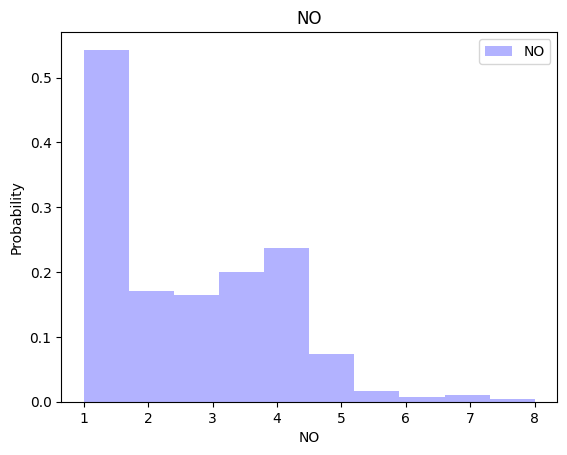

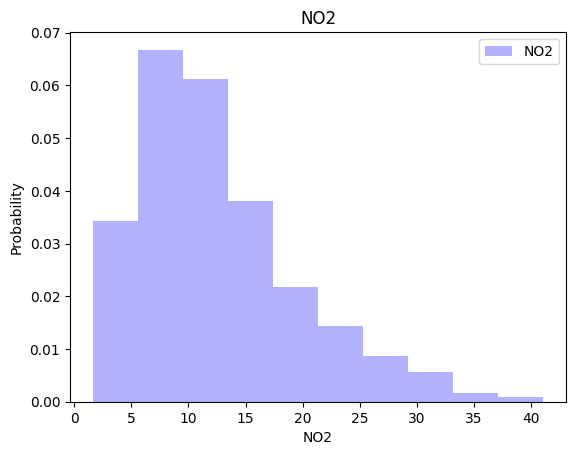

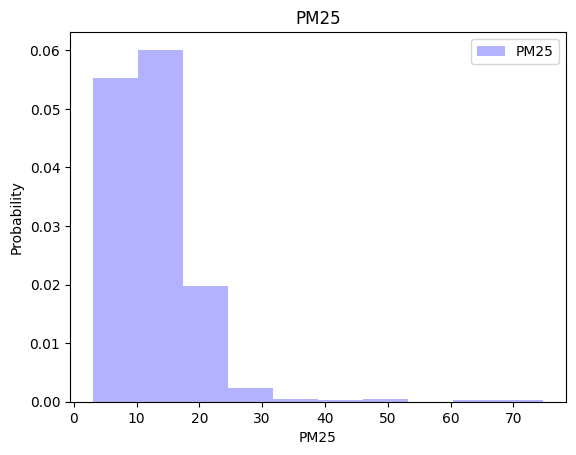

In [5]:
cols = df.columns.tolist()    # Here we make a list with all labels names

# Data visualization
for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
# First, shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
# We split the data into training (60%), validation (20%), and test (20%) sets

train_end = int(0.9 * len(df))

train = df[:train_end]
test = df[train_end:]

train = df[:train_end]
test = df[train_end:]

In [8]:
# Scaling :)

def preprocess_data(dataframe):
    # Separate features and target variable
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    return x, y


# Apply preprocessing to your datasets
train_x, train_y = preprocess_data(train)
test_x, test_y = preprocess_data(test)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, reciprocal

# Define the parameter distributions
param_dist = {'C': reciprocal(1, 100), 'gamma': uniform(0.01, 1), 'epsilon': uniform(0.01, 1)}

# Create SVR model
svr = SVR(kernel='linear')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'C': 33.688666437684844, 'epsilon': 0.23871058174218907, 'gamma': 0.3513177074066781}


In [10]:
# Train the final model with the best alpha

svr_model = SVR(kernel='rbf', **best_params)
svr_model.fit(train_x, train_y)

SVR(C=33.688666437684844, epsilon=0.23871058174218907, gamma=0.3513177074066781)

In [11]:
pred_y = svr_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 192.66


In [12]:
# Assuming Knn_model is your trained KNN regressor
pred_y = svr_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Custom Regression Report:
Mean Absolute Error: 10.97
Mean Squared Error: 192.66
R-squared (R2): 0.20
